<a href="https://colab.research.google.com/github/joshhan619/HandsOnEgoVLP/blob/main/egovqa_handsonvlm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Setup
Clone the Github repo, download pretrained EgoVLPv2 checkpoint, download EgoTaskQA data.


In [1]:
!python --version

Python 3.11.11


In [2]:
# Clone the GitHub repo
!git clone https://github.com/joshhan619/HandsOnEgoVLP.git

Cloning into 'HandsOnEgoVLP'...
remote: Enumerating objects: 286, done.
remote: Counting objects: 100% (286/286), done.
remote: Compressing objects: 100% (178/178), done.
remote: Total 286 (delta 104), reused 281 (delta 102), pack-reused 0 (from 0)
Receiving objects: 100% (286/286), 7.52 MiB | 6.71 MiB/s, done.
Resolving deltas: 100% (104/104), done.


In [ ]:
# Download the pretrained EgoVLPv2 checkpoint
!wget https://www.cis.jhu.edu/~shraman/EgoVLPv2/ckpts/Pre-trained/EgoVLPv2.pth

--2025-03-27 02:13:40--  https://www.cis.jhu.edu/~shraman/EgoVLPv2/ckpts/Pre-trained/EgoVLPv2.pth
Resolving www.cis.jhu.edu (www.cis.jhu.edu)... 104.18.36.137, 172.64.151.119, 2606:4700:4400::6812:2489, ...
Connecting to www.cis.jhu.edu (www.cis.jhu.edu)|104.18.36.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4579912049 (4.3G)
Saving to: ‘EgoVLPv2.pth’

EgoVLPv2.pth        100%[===================>]   4.26G  63.1MB/s    in 77s     

2025-03-27 02:14:59 (56.7 MB/s) - ‘EgoVLPv2.pth’ saved [4579912049/4579912049]



In [3]:
%cd /content/HandsOnEgoVLP
!cp requirements.txt requirements_backup.txt

/content/HandsOnEgoVLP


In [8]:
import pkg_resources
import subprocess

# Read current requirements.txt
with open("/content/HandsOnEgoVLP/requirements.txt", "r") as f:
    requirements = f.readlines()

# Upgrade each package
upgraded_reqs = []
for req in requirements:
    try:
        package = req.split("==")[0].strip()
        latest_version = subprocess.check_output(
            f"pip install {package} --upgrade --dry-run",
            shell=True, text=True
        ).split("\n")[-2]

        if "from versions" in latest_version:
            latest_version = latest_version.split("from versions: ")[1].split(",")[-1].strip(")")
        else:
            latest_version = "latest"

        upgraded_reqs.append(f"{package}=={latest_version}")
    except:
        upgraded_reqs.append(req.strip())

# Save new requirements file
with open("requirements_colab.txt", "w") as f:
    f.write("\n".join(upgraded_reqs))

print("✅ Updated requirements saved to `requirements_colab.txt`")

✅ Updated requirements saved to `requirements_colab.txt`


In [10]:
%cd /content/HandsOnEgoVLP
!pip install -r requirements_colab.txt

/content/HandsOnEgoVLP
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
  Using cached async_timeout-5.0.1-py3-none-any.whl.metadata (5.1 kB)
  Using cached av-14.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.6 kB)
  Using cached boto3-1.37.22-py3-none-any.whl.metadata (6.7 kB)
  Using cached botocore-1.37.22-py3-none-any.whl.metadata (5.7 kB)
  Using cached decord-0.6.0-py3-none-manylinux2010_x86_64.whl.metadata (422 bytes)
  Using cached dominate-2.9.1-py2.py3-none-any.whl.metadata (13 kB)
  Using cached ego4d-1.7.3.tar.gz (94 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached ffmpeg-1.4.tar.gz (5.1 kB)
  Preparing metadata (setup.py) ... done
  Using cached ftfy-6.3.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached pathtools-0.1.2.tar.gz (11 kB)
  Preparing metadata (s

In [11]:
!pip freeze --local > requirements_colab.txt

In [12]:
!pip check

ipython 7.34.0 requires jedi, which is not installed.


In [16]:
!wget https://www.cis.jhu.edu/~shraman/EgoVLPv2/datasets/EgoTaskQA/qa_videos.tgz
!wget https://www.cis.jhu.edu/~shraman/EgoVLPv2/datasets/EgoTaskQA/Data.tgz
!tar -xzf qa_videos.tgz && rm qa_videos.tgz
!tar -xzf Data.tgz && rm Data.tgz
!wget https://www.cis.jhu.edu/~shraman/EgoVLPv2/datasets/EgoTaskQA/reasoning_unique_cat.pth

--2025-03-28 04:24:31--  https://www.cis.jhu.edu/~shraman/EgoVLPv2/datasets/EgoTaskQA/qa_videos.tgz
Resolving www.cis.jhu.edu (www.cis.jhu.edu)... 104.18.36.137, 172.64.151.119, 2606:4700:4400::ac40:9777, ...
Connecting to www.cis.jhu.edu (www.cis.jhu.edu)|104.18.36.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15259979543 (14G) [application/x-gzip]
Saving to: ‘qa_videos.tgz’

qa_videos.tgz       100%[===================>]  14.21G  42.8MB/s    in 4m 2s   

2025-03-28 04:28:34 (60.2 MB/s) - ‘qa_videos.tgz’ saved [15259979543/15259979543]

--2025-03-28 04:28:34--  https://www.cis.jhu.edu/~shraman/EgoVLPv2/datasets/EgoTaskQA/Data.tgz
Resolving www.cis.jhu.edu (www.cis.jhu.edu)... 172.64.151.119, 104.18.36.137, 2606:4700:4400::ac40:9777, ...
Connecting to www.cis.jhu.edu (www.cis.jhu.edu)|172.64.151.119|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22504600 (21M) [application/x-gzip]
Saving to: ‘Data.tgz’

Data.tgz            100%

In [18]:
%cd /content/HandsOnEgoVLP/EgoTaskQA/
from EgoTaskQA_dataset import EgoTaskQA, collate_func
from transforms import init_transform_dict, init_video_transform_dict
import argparse

args = {
    "dataset_split_type": "direct",
    "model_name": "EgoVLPv2.pth",
    "per_gpu_batch_size": 8,
    "num_frames_per_video": 16,
    "frame_resolution": 224,
    "lr": 2e-4
}
args = argparse.Namespace(**args)

dataset_train = EgoTaskQA(dataset_name="EgoTaskQA", text_params={"input": "text"},
                                  video_params={"input_res": args.frame_resolution,
                                                "num_frames": args.num_frames_per_video,
                                                "loading": "lax"},
                                  data_dir="./qa_videos",
                                  meta_dir="./Data/qa/" + args.dataset_split_type,
                                  tsfms=init_video_transform_dict()['test'], reader='decord', split='train', neg_param=60, args=args)

print(f"Dataset train size: {len(dataset_train)}")
print(f"Number of classes: {len(dataset_train.classes)}")

/content/HandsOnEgoVLP/EgoTaskQA
Video Transform is used!


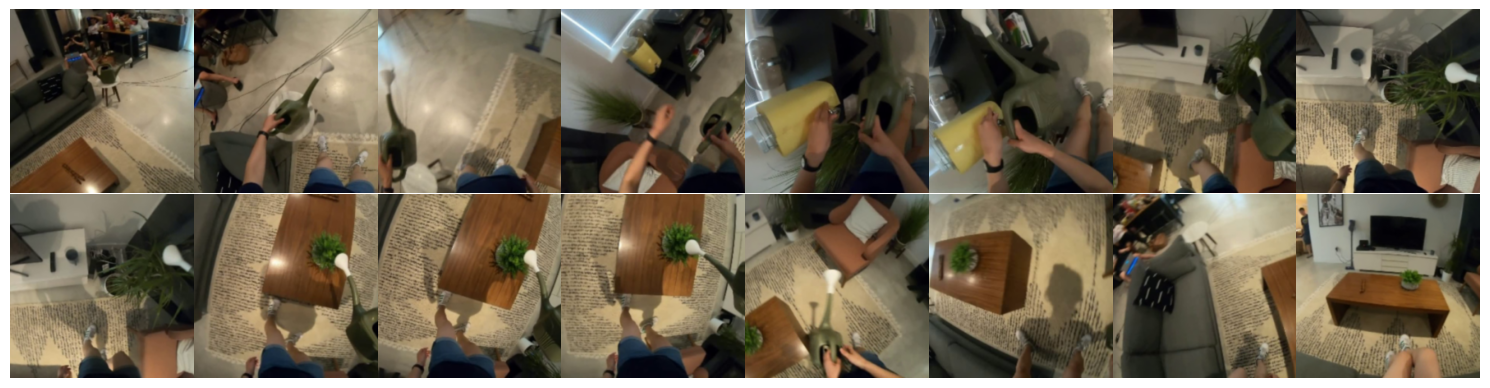

Sample question: What does the person want water3 to be for the first action did after the person pour from something into something in the video?
Question metadata:
	Type: ['explanatory']
	Category: ['intent']
	Semantic: state
	Reasoning: ['explanatory', 'intent', 'state', 'query', 'indirect']
Answer: in water pot


In [48]:
import matplotlib.pyplot as plt
import torch

# Show a sample's video frames
index = 100
sample = dataset_train[100]
nrows = (args.num_frames_per_video+1)//2
fig, ax = plt.subplots(2, nrows, figsize=(15,4))

norm_mean=torch.tensor((0.485, 0.456, 0.406))
norm_std=torch.tensor((0.229, 0.224, 0.225))

for i in range(args.num_frames_per_video):
    frame = sample["video"][i, :, :, :]
    frame = frame*norm_std.view(-1, 1, 1) + norm_mean.view(-1, 1, 1) # Unnormalize
    row = i//nrows
    col = i%nrows
    ax[row, col].imshow(frame.permute(1, 2, 0))
    ax[row, col].axis('off')
    ax[row, col].set_xticklabels = []
    ax[row, col].set_yticklabels = []

fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

print(f"Sample question: {sample['text']}")
print(f"Question metadata:")
print(f"\tType: {sample['meta']['type']}")
print(f"\tCategory: {sample['meta']['category']}")
print(f"\tSemantic: {sample['meta']['semantic']}")
print(f"\tReasoning: {sample['meta']['reasoning']}")
print(f"Answer: {dataset_train.metadata['answer'][sample['answer']]}")